In [ ]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리
from google.colab import drive
from google.colab import files
print("🌫🛸")

🌫🛸


In [ ]:
uploaded = files.upload()

Saving images.png.PNG to images.png (2).PNG


In [ ]:
uploaded = files.upload()

Saving shape_predictor_68_face_landmarks.dat to shape_predictor_68_face_landmarks.dat


In [ ]:
uploaded = files.upload()

Saving cat-whiskers.png to cat-whiskers.png


In [85]:
uploaded = files.upload()

Saving dark.PNG to dark.PNG


In [105]:
uploaded = files.upload()

Saving angle.PNG to angle.PNG


얼굴 회전 각도: 5.06°


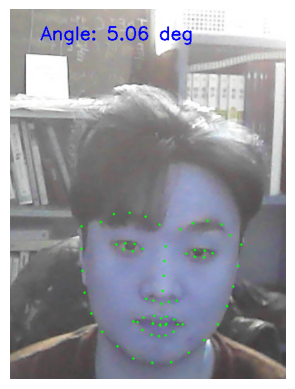

In [119]:
def adjust_brightness(img, factor=1.5):
    """
    이미지 밝기를 조정합니다.
    :param img: 입력 이미지
    :param factor: 밝기 조정 비율 (1.0은 원본, >1.0 밝게, <1.0 어둡게)
    :return: 밝기 조정된 이미지
    """
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # BGR → HSV 변환
    hsv[:, :, 2] = np.clip(hsv[:, :, 2] * factor, 0, 255)  # 밝기(V) 조정
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)  # HSV → BGR 변환

def enhance_image(img):
    """
    이미지를 밝게 하고 대비를 조정합니다.
    """
    # 밝기 및 대비 조정
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    # CLAHE 적용 (대비 향상)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    l = clahe.apply(l)

    # 병합 후 변환
    lab = cv2.merge((l, a, b))
    enhanced_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    return enhanced_img

detector = dlib.get_frontal_face_detector()  # dlib 얼굴 탐지기
predictor = dlib.shape_predictor(model_path)  # 랜드마크 예측기

def calculate_angle(landmarks):
    """
    얼굴 회전 각도(눈 기준)를 계산합니다.
    :param landmarks: 랜드마크 좌표 리스트 [(x1, y1), (x2, y2), ...]
    :return: 얼굴의 회전 각도 (degrees)
    """
    left_eye = landmarks[36]  # 왼쪽 눈
    right_eye = landmarks[45]  # 오른쪽 눈
    delta_x = right_eye[0] - left_eye[0]
    delta_y = right_eye[1] - left_eye[1]
    angle = np.degrees(np.arctan2(delta_y, delta_x))  # 각도를 계산 (radian → degree)
    return angle

def rotate_image(img, angle):
    """
    이미지를 주어진 각도로 회전합니다.
    :param img: 입력 이미지
    :param angle: 회전 각도
    :return: 회전된 이미지
    """
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(img, matrix, (w, h))

# 업로드된 파일 이름 (파일 이름을 업로드한 것에 맞게 수정)
my_image_path = 'images.png.PNG'

# 이미지 읽기
img_bgr = cv2.imread(my_image_path)

# 파일 확인
if img_bgr is None:
    raise ValueError(f"이미지를 로드할 수 없습니다: {my_image_path}")

img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)  # 회색조 변환
faces = detector(img_gray)

for face in faces:
    landmarks = predictor(img_gray, face)  # 랜드마크 예측
    landmarks_points = [(p.x, p.y) for p in landmarks.parts()]  # 좌표 추출

    # 얼굴 각도 계산
    angle = calculate_angle(landmarks_points)
    print(f"얼굴 회전 각도: {angle:.2f}°")

    # 얼굴 랜드마크와 각도 시각화
    for point in landmarks_points:
        cv2.circle(img_bgr, point, 2, (0, 255, 0), -1)  # 랜드마크 점 찍기

    # 회전 각도 텍스트 추가
    cv2.putText(img_bgr, f"Angle: {angle:.2f} deg", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

brightened_img = adjust_brightness(img_bgr, factor=1.3)
enhanced_img = enhance_image(img_bgr)

# BGR → RGB 변환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

img_show = img_bgr.copy()

# 이미지 출력
plt.imshow(img_bgr)
plt.axis('off')  # 축 숨기기
plt.show()

rectangles[[(111, 320) (379, 587)]]


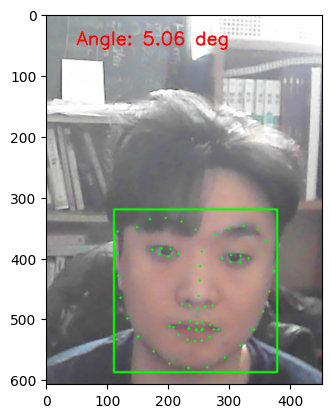

In [120]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()




In [121]:
model_path = 'shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


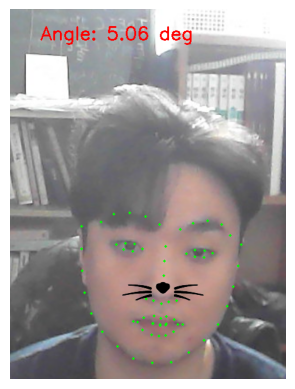

In [122]:

# dlib_rects와 list_landmarks는 얼굴 영역과 랜드마크 정보라고 가정
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):  # 얼굴 영역과 랜드마크 반복
    x = landmark[30][0]  # 코 부위의 x좌표
    y = landmark[30][1]  # 코 부위의 y좌표
    w = h = dlib_rect.width() // 2  # 얼굴 너비의 절반으로 스티커 크기 설정

sticker_path = 'cat-whiskers.png'  # 수염 이미지 경로
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)  # RGBA 채널 포함하여 읽기

# 스티커 이미지 크기 조정
img_sticker = cv2.resize(img_sticker, (w, h), interpolation=cv2.INTER_AREA)

# x, y 좌표를 조정하여 스티커를 코 아래에 배치
refined_x = x - w // 2  # 스티커의 중심을 코 중심에 맞춤
refined_y = y - 2 * h // 4  # 스티커를 코 아래로 약간 이동

# 음수 좌표 처리: 스티커가 이미지 경계를 넘어가지 않도록 조정
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0
if refined_x + img_sticker.shape[1] > img_show.shape[1]:
    img_sticker = img_sticker[:, :img_show.shape[1] - refined_x]
if refined_y + img_sticker.shape[0] > img_show.shape[0]:
    img_sticker = img_sticker[:img_show.shape[0] - refined_y, :]

# 스티커를 원본 이미지에 적용
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

if img_sticker.shape[2] == 4:  # RGBA 채널이 있는 경우 알파 채널 처리
    alpha = img_sticker[:, :, 3] / 255.0  # 알파 채널
    for c in range(3):  # RGB 채널에 알파 블렌딩 적용
        sticker_area[:, :, c] = (alpha * img_sticker[:, :, c] +
                                 (1 - alpha) * sticker_area[:, :, c]).astype(np.uint8)
else:  # 알파 채널이 없는 경우
    img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = img_sticker

# 최종 결과 출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')  # 축 숨기기
plt.show()

###회기록
images를 계속 인식을 하지 못해서 30분 동안 방법을 찾아보다가 구글 드라이브에서
마운트 하는 방식에서 그냥 업로드 하는 방식으로 바꾸는 방식으로 해결하였습니다.
일반적인 화면에서는 잘되는것을 확인

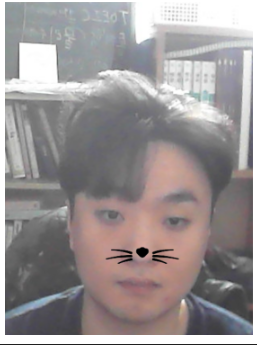

case 1. 어두운화면에서는 얼굴을 인식을 하지 못하는 것을 확인하였습니다.

def adjust_brightness(img, factor=1.5):
    """
    이미지 밝기를 조정합니다.
    :param img: 입력 이미지
    :param factor: 밝기 조정 비율 (1.0은 원본, >1.0 밝게, <1.0 어둡게)
    :return: 밝기 조정된 이미지
    """
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # BGR → HSV 변환
    hsv[:, :, 2] = np.clip(hsv[:, :, 2] * factor, 0, 255)  # 밝기(V) 조정
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)  # HSV → BGR 변환

  위 함수를 이용하여 밝기 조절을 하려고 하였으나 너무 어두운 경우에는 의미가 크게 없었습니다 ...
 -> 밝기와 대비를 높이는걸로 해결하려고 하였으나 잘 되지 않았습니다. -> 얼굴을 인식하지 못하고 그렇게 되니 랜드마크도 설정이 되지 않음.

 case 2. 얼굴이 밑으로 살짝 잘리고 각도가 달라졌을 때

 문제 : 얼굴을 인식하지 못함.

 해결 방법 : 얼굴 각도를 계산해야하고 그리고 회전할 수 있어야함.

-> 함수를 만드는 중이였으나 시간부족으로 하지 못했습니다 ....
